***
# Midterm

**Course:** MATH 616 - Data-Driven Dynamical Systems, Stochastic Modeling and Prediction

**Name:** Shrivats Sudhir

**NetID:** ssudhir2

**Email:** ssudhir2@wisc.edu
***

In [22]:
import numpy as np
from numpy import linalg
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from joblib import Parallel, delayed
from scipy.optimize import curve_fit
import seaborn as sns
from scipy.stats import norm

# Question 1.

**Consider the following linear Gaussian SDE:**
$$dx_t = -x_t\;dt + dW_t, \quad x_0=1$$

We can re-write the above as:
$$dx_t = (-a x_t + f_t) d_t + \sigma dW_t$$

where $a=1$, $f_t=0$ and $\sigma=1$

## (a.)

**Use the Euler-Maruyama method to create a numerical simulation. Plot a time series to illustrate the solution.**

Running short time simulation...


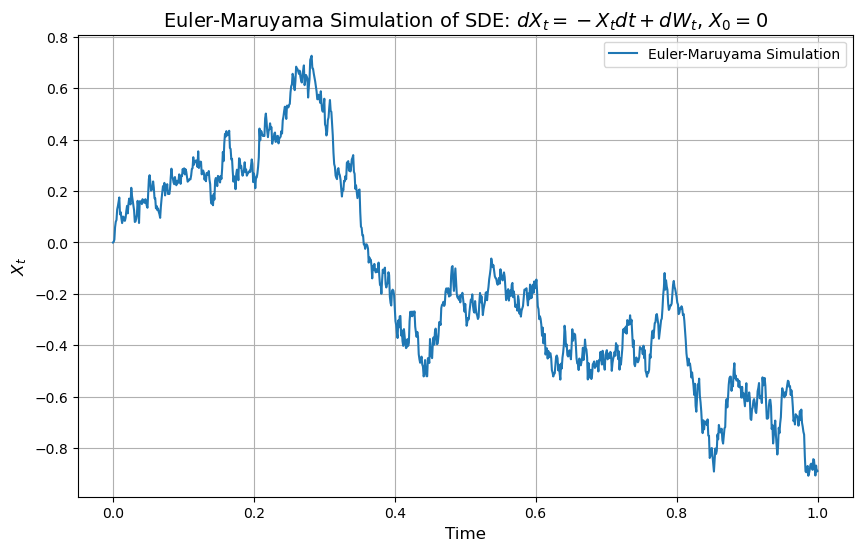

In [23]:
def dXt(Xt, dt, dWt):
    """SDE function dX_t = -X_t * dt + dW_t."""
    return -Xt * dt + dWt

def euler_maruyama(T, N, X0):
    """
    Euler-Maruyama method to solve the SDE:
    dX_t = -X_t dt + dW_t, X_0 = X0
    
    Parameters:
    - T: total time
    - N: number of time steps
    - X0: initial value of the process
    
    Returns:
    - t: array of time points
    - Xt: array of simulated values of the process
    """
    dt = T / N
    t = np.linspace(0, T, N+1)
    
    # Initialize the array for the solution
    Xt = np.zeros(N+1)
    Xt[0] = X0  # Initial condition
    
    # Simulate the process using Euler-Maruyama
    for i in range(N):
        dWt = np.random.normal(0, np.sqrt(dt))  # Wiener process increment
        Xt[i+1] = Xt[i] + dXt(Xt[i], dt, dWt)  # Corrected update equation
    
    return t, Xt

# Function to run simulation and create plots
def run_simulation(T, N, X0):
    # Run the Euler-Maruyama simulation
    t, Xt = euler_maruyama(T, N, X0)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(t, Xt, label='Euler-Maruyama Simulation')
    plt.title(f'Euler-Maruyama Simulation of SDE: $dX_t = -X_t dt + dW_t$, $X_0 = {X0}$', fontsize=14)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('$X_t$', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return t, Xt

# Short time simulation
print("Running short time simulation...")
t, Xt = run_simulation(T=1, N=1000, X0=0)

## (b.)

**Using time series data from your numerical simulation, find a numerical estimate of $\langle x_t^2 \rangle$ in statistical equilibrium (for large time $t$).**

Theoretically, we know that the equilibrium solution of the variance (6.7) is given by:
$$\mu(x)_{\infty} = \frac{f}{a} = \frac{0}{1} = 0$$
$$\text{Var}(x)_{\infty} = \frac{\sigma^2}{2a} = \frac{1^2}{2 \cdot 1} = \frac{1}{2}$$

Numerical estimate of ⟨x_t⟩ in equilibrium: -0.0421
Numerical estimate of ⟨x_t^2⟩ in equilibrium: 0.5131




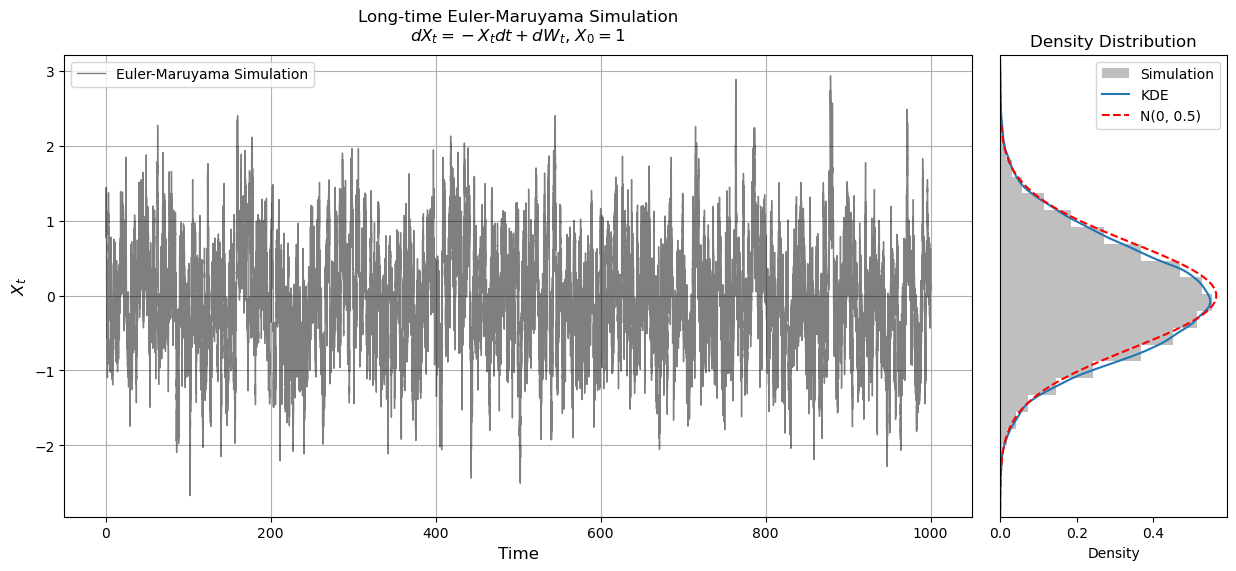

In [24]:
def estimate_mean_var(Xt):
    return np.mean(Xt), np.mean(Xt**2)

# Run the simulation
T = 1000  # Large total time to ensure equilibrium is reached
N = 100000  # Number of steps
X0 = 1  # Initial condition
t, Xt = euler_maruyama(T, N, X0)

# Calculate equilibrium statistics
equilibrium_data = Xt[N//3:]  # Use only the latter 2/3 of the time series
x_mean_equilibrium, x_squared_mean_equilibrium = estimate_mean_var(Xt)
print(f"Numerical estimate of ⟨x_t⟩ in equilibrium: {x_mean_equilibrium:.4f}")
print(f"Numerical estimate of ⟨x_t^2⟩ in equilibrium: {x_squared_mean_equilibrium:.4f}")
print("\n")

# Create figure with custom layout
fig = plt.figure(figsize=(15, 6))

# Create a GridSpec layout with different column widths and minimal spacing
gs = plt.GridSpec(1, 2, width_ratios=[4, 1], wspace=0.05)

# Left subplot: Time series (larger)
ax1 = plt.subplot(gs[0])
ax1.plot(t, Xt, alpha=0.5, color='black', label='Euler-Maruyama Simulation', linewidth=1)
ax1.set_title('Long-time Euler-Maruyama Simulation\n$dX_t = -X_t dt + dW_t$, $X_0 = 1$', pad=10)
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('$X_t$', fontsize=12)
ax1.grid(True)
ax1.legend()

# Right subplot: Rotated histogram
ax2 = plt.subplot(gs[1])
# Create horizontal histogram
ax2.hist(Xt, bins=25, density=True, orientation='horizontal',
         alpha=0.5, color='grey', label='Simulation')

# Kernel Density Estimate (rotated)
kde = sns.kdeplot(y=Xt, ax=ax2, fill=False, label='KDE')

# Theoretical distribution
mean, std = 0, np.sqrt(0.5)
y = np.linspace(-3, 3, 100)
pdf = norm.pdf(y, mean, std)
ax2.plot(pdf, y, 'r--', label='N(0, 0.5)')

ax2.set_title('Density Distribution')
ax2.set_xlabel('Density')
ax2.set_ylabel('')
ax2.legend()

# Adjust y-axis limits to match between plots
ylim = ax1.get_ylim()
ax2.set_ylim(ylim)

# Remove right subplot's y-ticks since they're redundant
ax2.set_yticks([])

plt.show()

## (c.)

**Using time series data from your numerical simulation, find a numerical estimate of the autocorrelation function, $R(s)$.**

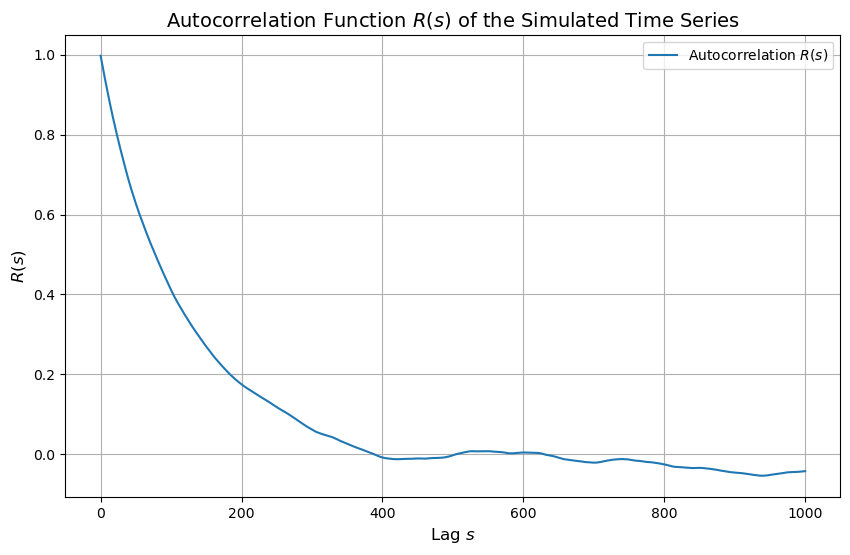

First few autocorrelation values:
R(0) = 0.9971
R(1) = 0.9875
R(2) = 0.9780
R(3) = 0.9685
R(4) = 0.9592
R(5) = 0.9499
R(6) = 0.9407
R(7) = 0.9317
R(8) = 0.9227
R(9) = 0.9138
R(10) = 0.9050
R(11) = 0.8963
R(12) = 0.8877
R(13) = 0.8792
R(14) = 0.8708
R(15) = 0.8624
R(16) = 0.8543
R(17) = 0.8463
R(18) = 0.8385
R(19) = 0.8308
R(20) = 0.8231
R(21) = 0.8154
R(22) = 0.8078
R(23) = 0.8003
R(24) = 0.7929
R(25) = 0.7856
R(26) = 0.7783
R(27) = 0.7712
R(28) = 0.7642
R(29) = 0.7573
R(30) = 0.7503
R(31) = 0.7435
R(32) = 0.7367
R(33) = 0.7300
R(34) = 0.7232
R(35) = 0.7165
R(36) = 0.7098
R(37) = 0.7032
R(38) = 0.6967
R(39) = 0.6904
R(40) = 0.6841
R(41) = 0.6780
R(42) = 0.6721
R(43) = 0.6662
R(44) = 0.6605
R(45) = 0.6548
R(46) = 0.6492
R(47) = 0.6436
R(48) = 0.6381
R(49) = 0.6327


In [25]:
def estimate_autocorrelation(Xt, max_lag):
    mean, var = estimate_mean_var(Xt)
    N = len(Xt)
    R = np.zeros(max_lag+1)

    for s in range(max_lag+1):
        R[s] = np.mean((Xt[:N-s] - mean) * (Xt[s:N] - mean)) / var

    return R

# Run the simulation
T = 1000  # Large total time to ensure equilibrium is reached
N = 100000  # Number of steps
X0 = 1  # Initial condition
t, Xt = euler_maruyama(T, N, X0)

# Maximum lag to calculate autocorrelation
max_lag = 1000

# Calculate the autocorrelation function R(s)
R_s = estimate_autocorrelation(Xt, max_lag)

# Plot the autocorrelation function
plt.figure(figsize=(10, 6))
plt.plot(range(max_lag + 1), R_s, label='Autocorrelation $R(s)$')
plt.title('Autocorrelation Function $R(s)$ of the Simulated Time Series', fontsize=14)
plt.xlabel('Lag $s$', fontsize=12)
plt.ylabel('$R(s)$', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Print the first few autocorrelation values
print("First few autocorrelation values:")
for s in range(50):
    print(f"R({s}) = {R_s[s]:.4f}")

# Question 2.

**Consider the following ODE system:**

$$\frac{du_1}{dt} = -2u_1 + u_2 + 1$$
$$\frac{du_2}{dt} = 2u_1 - 3u_2 + 1$$

## (a.)

**Derive the analytic solution of this system using the eigen-decomposition method.**

We can re-write the ODE system of equation as follows:
$$\frac{d\mathbf{u}}{dt} = \underbrace{\begin{bmatrix} -2 & 1\\ 2 & -3 \end{bmatrix}}_{=\mathbf{A}} \cdot \underbrace{\begin{bmatrix} u_1\\ u_2 \end{bmatrix}}_{=\mathbf{u}} + \underbrace{\begin{bmatrix} 1\\ 1 \end{bmatrix}}_{=\mathbf{b}}$$

Now, in order to make the above ODE system homogenous:
\begin{equation*}
    \begin{split}
        0 &= \begin{bmatrix} -2 & 1\\ 2 & -3 \end{bmatrix} \cdot \begin{bmatrix} u^*_1\\ u^*_2 \end{bmatrix} + \begin{bmatrix} 1\\ 1 \end{bmatrix}\\
        \\
        \begin{bmatrix} -1\\ -1 \end{bmatrix} &= \begin{bmatrix} -2 & 1\\ 2 & -3 \end{bmatrix} \cdot \begin{bmatrix} u^*_1\\ u^*_2 \end{bmatrix}\\
        \\
    \end{split}
\end{equation*}

Solving for $u_1$ and $u_2$, we have that:
\begin{equation*}
    \begin{split}
        -1 = -2u^*_1 + u^*_2, &\quad -1 = 2u^*_1 - 3u^*_2\\
        \\
        2u^*_1 - 1 = u^*_2, &\quad \frac{1}{3} + \frac{2}{3}u^*_1 = u^*_2\\
        \\
        u^*_1 = 1, &\quad u^*_2 = 1
    \end{split}
\end{equation*}

Defining a new variable $\mathbf{v} = \mathbf{u} - \mathbf{u}^* = \begin{bmatrix} u_1-1 \\ u_2-1 \end{bmatrix}$, our homogenous ODE system in vector form can now be written as:
$$\frac{d\mathbf{v}}{dt} + \mathbf{\tilde{A}}\mathbf{v} = 0$$
where $\mathbf{\tilde{A}} = -\mathbf{A} = \begin{bmatrix} 2 & -1\\ -2 & 3 \end{bmatrix}$

Now, we know that the eigenvalues of $\mathbf{\tilde{A}}$ can be computed as:
$$\mathbf{\tilde{A}}\mathbf{x} = \lambda \mathbf{x}$$

which, in matrix form can be re-written as:
$$\mathbf{\tilde{A}}\mathbf{C} = \mathbf{C} \Lambda$$
where $\Lambda$ is the diagonal matrix containing eigenvalues, and $C$ is the matrix containing eigenvectors as columns.

Finally, we conclude that:
$$\mathbf{\tilde{A}} = \mathbf{C} \Lambda \mathbf{C}^{-1}$$

In [26]:
A = np.array([[2, -1], 
              [-2, 3]])

eigenvalues, eigenvectors = np.linalg.eig(A)
L = np.diag(eigenvalues)
C = eigenvectors
print("eigenvalues as a diagonal matrix (lambda):\n", L)
print('\n')
print("eigenvectors as columns of matrix (C):\n", C)
print('\n')
print("Confirming eigen-decomposition procedure (A - C^-1 * L * C) ~ 0:\n", A - (C @ L @ linalg.inv(C)))

eigenvalues as a diagonal matrix (lambda):
 [[1. 0.]
 [0. 4.]]


eigenvectors as columns of matrix (C):
 [[-0.70710678  0.4472136 ]
 [-0.70710678 -0.89442719]]


Confirming eigen-decomposition procedure (A - C^-1 * L * C) ~ 0:
 [[ 0.00000000e+00  0.00000000e+00]
 [-2.22044605e-16  0.00000000e+00]]


Therefore, we now have that:
$$\Lambda = \begin{bmatrix} 1 & 0\\ 0 & 4 \end{bmatrix}, C = \begin{bmatrix} -0.70710678 & 0.4472136\\ -0.70710678 & -0.89442719 \end{bmatrix}$$

which lets us write our homogenous ODE as:
\begin{equation*}
    \begin{split}
        0 &= \frac{d\mathbf{v}}{dt} + \mathbf{\tilde{A}}\mathbf{v}\\
          &= \frac{d\mathbf{v}}{dt} + (\mathbf{C} \Lambda \mathbf{C}^{-1})\mathbf{v}\\
          &= \mathbf{C}^{-1}\frac{d\mathbf{v}}{dt} + \Lambda (\mathbf{C}^{-1}\mathbf{v})
    \end{split}
\end{equation*}

Now, suppose $\mathbf{w} = \mathbf{C}^{-1}\mathbf{v}$, then our ODE can now bw written as:
$$\frac{d\mathbf{w}}{dt} + \Lambda \mathbf{w} = 0$$

As we know $\Lambda$ is a diagonal matrix, we can look at each vector element $w_i$ and solve the respective ODE as follows:
\begin{equation*}
    \begin{split}
        0 &= \frac{dw_i}{dt} + \lambda_i w_i\\
        \\
        -\lambda_i w_i &= \frac{dw_i}{dt}\\
        \\
        -\lambda_i d_t &= \frac{1}{w_i} dw_i\\
        \\
        \int -\lambda_i d_t &= \int \frac{1}{w_i} dw_i\\
        \\
        -\lambda_i t &= \text{log}(w_i) + k\\
        \\
        k_i \cdot \text{exp}(-\lambda_i t) &= w_i
    \end{split}
\end{equation*}

Therefore, we can re-write vector $\mathbf{w}$ as follows:
$$\mathbf{w} = \begin{bmatrix} k_1 \cdot \text{exp}(-\lambda_1 t)\\ k_2 \cdot \text{exp}(-\lambda_2 t) \end{bmatrix}$$

Substituting the eigenvalues $\lambda_1=1$ and $\lambda_2=4$, we have that:
$$\mathbf{w} = \begin{bmatrix} k_1 \cdot \text{exp}(-t)\\ k_2 \cdot \text{exp}(-4t) \end{bmatrix}$$

Now, as $\mathbf{w} = \mathbf{C}^{-1}\mathbf{v} \iff \mathbf{C} \mathbf{w} = \mathbf{v}$, we have that:
$$\mathbf{v} = \begin{bmatrix} -0.70710678 & 0.4472136\\ -0.70710678 & -0.89442719 \end{bmatrix} \cdot \begin{bmatrix} k_1 \cdot \text{exp}(-t)\\ k_2 \cdot \text{exp}(-4t) \end{bmatrix} = \begin{bmatrix} -0.70710678 \cdot k_1 \cdot \text{exp}(-t) + 0.4472136 \cdot k_2 \cdot \text{exp}(-4t)\\ -0.70710678 \cdot k_1 \cdot \text{exp}(-t) - 0.89442719 \cdot k_2 \cdot \text{exp}(-4t) \end{bmatrix}$$

Finally, as $\mathbf{u} = \mathbf{u} - \mathbf{u}^* \iff \mathbf{v} + \mathbf{u}^* = \mathbf{u}$, we have that:
$$\mathbf{u} = \begin{bmatrix} -0.70710678 \cdot k_1 \cdot \text{exp}(-t) + 0.4472136 \cdot k_2 \cdot \text{exp}(-4t) + 1\\ -0.70710678 \cdot k_1 \cdot \text{exp}(-t) - 0.89442719 \cdot k_2 \cdot \text{exp}(-4t) + 1 \end{bmatrix}$$

In other words, the analytical solution of the ODE is:
$$u_1 = -0.70710678 \cdot k_1 \cdot \text{exp}(-t) + 0.4472136 \cdot k_2 \cdot \text{exp}(-4t) + 1$$
$$u_2 = -0.70710678 \cdot k_1 \cdot \text{exp}(-t) - 0.89442719 \cdot k_2 \cdot \text{exp}(-4t) + 1$$

In [27]:
def u1(k1, k2, t):
    return C[0][0] * k1 * np.exp(-t) + C[0][1] * k2 * np.exp(-4*t) + 1

def u2(k1, k2, t):
    return C[1][0] * k1 * np.exp(-t) + C[1][1] * k2 * np.exp(-4*t) + 1

## (b.)

**Then use forward Euler numerical scheme to validate your solution. In the numerical validation, you may choose the initial values to be $u_{1}(0) = 0.5$, $u_{2}(0) = 1.5$ and the final time $T = 5$.**

Given $u_1(0)=0.5$, we have that:
$$-0.70710678 \cdot k_1 + 0.4472136 \cdot k_2 = -0.5$$

Given $u_2(0)=5$, we have that:
$$-0.70710678 \cdot k_1 - 0.89442719 \cdot k_2 = 0.5$$

We can solve the equations simulatenously to derive the constants $k_1$ and $k_2$ resepctively.

In [28]:
k1, k2 = np.linalg.solve(C,  np.array([-0.5, 0.5]))
print(f"k1 = {k1}, k2 = {k2}")

k1 = 0.2357022603955159, k2 = -0.7453559924999299


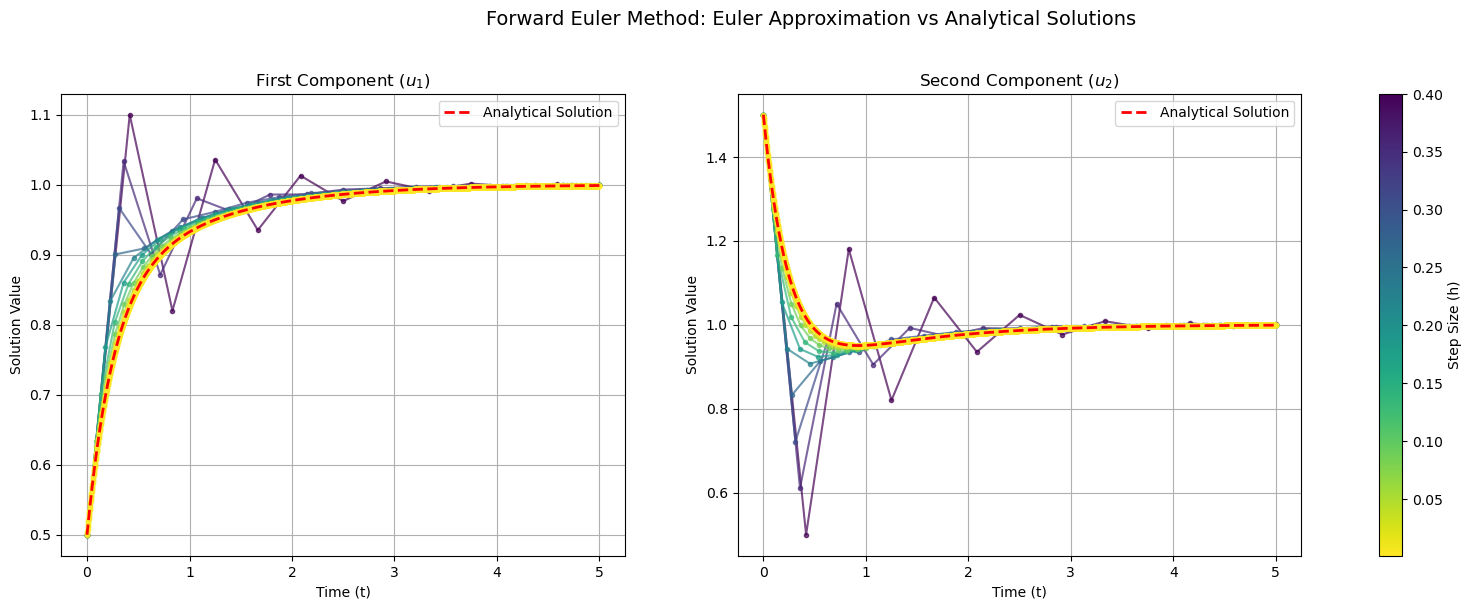

In [29]:
def du1_dt(u1, u2):
    """ODE function u' = -2*u1 + u2 + 1."""
    return (-2*u1 + u2 + 1)

def du2_dt(u1, u2):
    """ODE function u' = 2*u1 - 3*u2 + 1"""
    return (2*u1 - 3*u2 + 1)

def forward_euler(u10, u20, t0, tend, h):
    """Forward Euler method implementation."""
    num_steps = int((tend-t0)/h)
    t = np.linspace(t0, tend, num_steps+1)
    y = np.zeros(shape=(num_steps+1, 2))
    y[0] = np.array([u10, u20])
    for i in range(num_steps):
        u1, u2 = y[i]
        y[i+1] = np.array([
            u1 + h * du1_dt(u1=u1, u2=u2),
            u2 + h * du2_dt(u1=u1, u2=u2)
        ])
    return (t, y)

# Set figure style
plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
fig.patch.set_facecolor('white')
for ax in [ax1, ax2]:
    ax.set_facecolor('white')

# Define fewer step sizes for clarity
h_values = np.linspace(0.4, 0.001, 10)
colors = plt.cm.viridis(np.linspace(0, 1, len(h_values)))

# Get analytical solution
t_analytical = np.linspace(0, 5, 1000)
u1_analytical = [u1(k1, k2, t) for t in t_analytical]
u2_analytical = [u2(k1, k2, t) for t in t_analytical]

# Initial conditions
u10 = u1(k1=k1, k2=k2, t=0)
u20 = u2(k1=k1, k2=k2, t=0)

# Plot solutions
for i, h in enumerate(h_values):
    t_numerical, y_numerical = forward_euler(u10, u20, 0, 5, h)
    alpha = 0.7
    ax1.plot(t_numerical, y_numerical[:, 0], marker='o', markersize=3, 
             color=colors[i], alpha=alpha)
    ax2.plot(t_numerical, y_numerical[:, 1], marker='o', markersize=3, 
             color=colors[i], alpha=alpha)

# Add analytical solutions
ax1.plot(t_analytical, u1_analytical, '--', color='red', linewidth=2, label='Analytical Solution')
ax2.plot(t_analytical, u2_analytical, '--', color='red', linewidth=2, label='Analytical Solution')

# Add main title
fig.suptitle('Forward Euler Method: Euler Approximation vs Analytical Solutions', 
             fontsize=14, y=1.02)

# Customize plots
ax1.set_title('First Component ($u_1$)', fontsize=12)
ax2.set_title('Second Component ($u_2$)', fontsize=12)

for ax in [ax1, ax2]:
    ax.set_xlabel('Time (t)', fontsize=10)
    ax.set_ylabel('Solution Value', fontsize=10)
    ax.grid(True)
    ax.legend()

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='viridis_r', norm=plt.Normalize(vmin=h_values.min(), vmax=h_values.max()))
cbar = fig.colorbar(sm, ax=[ax1, ax2])
cbar.set_label('Step Size (h)', fontsize=10)

plt.show()

# Question 3.

**Consider the Gaussian distribution $p(x_1, x_2, x_3)$ with mean $\mu$ and covariance $\mathbf{\Sigma}$ being:**

$$\mathbf{\mu} = \begin{bmatrix} 1\\ 2\\ 3\\ \end{bmatrix}, \quad \mathbf{\Sigma} = \begin{bmatrix} 3 & 1 & -1\\ 1 & 4 & 2\\ -1 & 2 & 3 \end{bmatrix}$$

## (a.)

**What is the marginal distribution $p(x_1, x_3)$?**

Applying proposition 3.7 (Marginal density of Gaussian) from the notes, we have that:
$$\tilde{\mu} = \begin{bmatrix} 1\\3\end{bmatrix}, \tilde{\Sigma} = \begin{bmatrix} 3 & -1\\ -1 & 3 \end{bmatrix}$$

In other words,
$$ p(x_1, x_3) \sim \mathcal{N}(\tilde{\mu}, \tilde{\Sigma}) $$

In [30]:
def marginal_gaussian(mu, Sigma, index):
    return mu[index], Sigma[np.ix_(index, index)]

mu = np.array([1, 2, 3])
Sigma = np.array([[3, 1, -1], 
                  [1, 4, 2], 
                  [-1, 2, 3]])
marginal_mu, marginal_Sigma = marginal_gaussian(mu, Sigma, [0,2])

print("marginal mean:\n", marginal_mu)
print('\n')
print("marginal covariance matrix:\n", marginal_Sigma)

marginal mean:
 [1 3]


marginal covariance matrix:
 [[ 3 -1]
 [-1  3]]


## (b.)

**What is the conditional distribution $p(x_1, x_3 | x_2 = 2)$?**

Applying proposition 3.8 (Conditional density of Gaussian) from the notes, we have that:

$$\mu^* = \begin{bmatrix} \begin{bmatrix} 1\\ 3 \end{bmatrix}\\ 2\end{bmatrix}$$

$$\Sigma^* = \begin{bmatrix} \begin{bmatrix} 3 & -1\\ -1 & 3 \end{bmatrix} & \begin{bmatrix} 1 \\ 2\end{bmatrix}\\ \begin{bmatrix} 1 & 2 \end{bmatrix} & [4] \end{bmatrix}$$

where $\mu^*$ and $\Sigma^*$ are partitioned mean vector and covariance matrix respectively.

Now, we know that:
$$\bar{\mu} = \begin{bmatrix} 1\\ 3 \end{bmatrix} + \begin{bmatrix} 1 \\ 2\end{bmatrix} \cdot\frac{1}{4} (2 - 2) = \begin{bmatrix} 1\\ 3 \end{bmatrix} = \tilde{\mu}$$

\begin{equation*}
    \begin{split}
        \bar{\Sigma} &= \begin{bmatrix} 3 & -1\\ -1 & 3 \end{bmatrix} - \begin{bmatrix} 1 \\ 2\end{bmatrix} \cdot \frac{1}{4} \cdot \begin{bmatrix} 1 & 2\end{bmatrix}\\
        \\
                    &= \begin{bmatrix} 3 & -1\\ -1 & 3 \end{bmatrix} - \begin{bmatrix} 1/4 & 1/2\\ 1/2 & 1\end{bmatrix}\\
        \\
                    &= \begin{bmatrix} 11/4 & -3/2\\ -3/2 & 2 \end{bmatrix}\\   
    \end{split}
\end{equation*}

In [31]:
def conditional_gaussian(mu, Sigma, given_index, given_value):
    n = len(mu)
    all_index = np.arange(n)

    not_given_index = np.setdiff1d(all_index, given_index)

    mu_1 = mu[not_given_index]
    mu_2 = mu[given_index]

    Sigma_11 = Sigma[np.ix_(not_given_index, not_given_index)]
    Sigma_12 = Sigma[np.ix_(not_given_index, given_index)]
    Sigma_21 = Sigma[np.ix_(given_index, not_given_index)]
    Sigma_22 = Sigma[np.ix_(given_index, given_index)]

    return mu_1 + Sigma_12 @ linalg.inv(Sigma_22) @ (given_value - mu_2), Sigma_11 - Sigma_12 @ linalg.inv(Sigma_22) @ Sigma_21

mu = np.array([1, 2, 3])
Sigma = np.array([[3, 1, -1], 
                  [1, 4, 2], 
                  [-1, 2, 3]])

conditional_mu, conditional_Sigma = conditional_gaussian(mu, Sigma, 
                                                         given_index=[1], 
                                                         given_value=np.array([2]))

print("conditional mean:\n", conditional_mu)
print('\n')
print("conditional covariance matrix:\n", conditional_Sigma)

conditional mean:
 [1. 3.]


conditional covariance matrix:
 [[ 2.75 -1.5 ]
 [-1.5   2.  ]]


## (c.)

**If you are allowed to change the entries in the covariance matrix, which entries will you change that will make the marginal distribution $p(x_1, x_3)$ and the conditional distribution $p(x_1, x_3 | x_2 = 2)$ become the same?**

We know that as $x_2=2$ and $\mu_2=2$ and therefore $x_2-\mu_2=0$ which implies $\tilde{\mu} = \bar{\mu}$.

For equating $\tilde{\Sigma} = \bar{\Sigma}$, we can do the following:
\begin{equation*}
    \begin{split}
        \bar{\Sigma} &= \underbrace{\begin{bmatrix} 3 & -1\\ -1 & 3 \end{bmatrix}}_{=\tilde{\Sigma}} - \underbrace{\mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}^{-1}}\mathbf{\Sigma_{21}}}_{=0}\\
    \end{split}
\end{equation*}

We can achieve this by equation $\mathbf{\Sigma_{12}}=\begin{bmatrix} 0\\ 0 \end{bmatrix}$ and $\mathbf{\Sigma_{21}}=\begin{bmatrix} 0 & 0 \end{bmatrix}$, i.e.,
$$\mathbf{\Sigma} = \begin{bmatrix} 3 & 0 & -1\\ 0 & 4 & 0\\ -1 & 0 & 3 \end{bmatrix}$$

## Question 4.

**Devise a Monte Carlo method to compute $e = 2.71828...$, and conduct numerical experiments to illustrate the accuracy as a function of the number of samples.**

Presented below is a novel approach integrating Monte Carlo simulation with binary search to approximate Euler's number, $e$.

Consider the following relationship:
$$\int_{1}^{e} \frac{1}{x}\;dx = \bigg[\log(x)\bigg]_{1}^{e} = 1$$

Our objective is to estimate the upper limit of the integral such that the definite integral evaluates to 1.

To evaluate this integral using a Monte Carlo approach, we generate  uniformly distributed samples from the interval $[1, \text{mid}]$, where $\text{mid}=(\text{low}+\text{high})/2$. We then explicitly compute the expectation as follows:

\begin{equation*}
    \begin{split}
        \mathbb{E}[1/X] &= \int_{1}^{\text{mid}} \frac{1}{x} \cdot \frac{1}{\text{mid}-1}\;dx\\
        \\
        \mathbb{E}[1/X] &= \frac{1}{\text{mid}-1} \int_{1}^{\text{mid}} \frac{1}{x}\;dx\\
        \\
        \mathbb{E}[1/X] &= \frac{1}{\text{mid}-1} \bigg[\text{log}(x)\bigg]_{1}^{\text{mid}}\\
        \\
        \mathbb{E}[1/X] &= \frac{\text{log}(\text{mid})}{\text{mid}-1}\\
        \\
        \underbrace{\mathbb{E}[1/X] \cdot (\text{mid}-1)}_{= \xi} &= \text{log}(\text{mid})
    \end{split}
\end{equation*}

Our goal is to determine the value of $\text{mid}$ such that $\xi=1$, which implies.
$$ \xi = 1 \iff \mathbb{E}[1/X] \cdot (\text{mid}-1) = 1 \iff \text{log}(\text{mid}) = 1 \iff \text{mid}=e$$

To achieve this, we iteratively adjust the bounds using a binary search algorithm. We start with $\text{low}=1$ and $\text{high}=4$.

* If the estimated value $\xi$ is greater than 1, we update the upper bound to $\text{high}=\text{mid}$. 

* If the estimated value $\xi$ is lesser than 1, we update the lower bound to $\text{low}=\text{mid}$. 

This process is repeated until convergence is achieved, providing an estimate for $e$.

In [36]:
def monte_carlo_estimate_xi(M, mid):
    return np.mean(1 / np.random.uniform(low=1, high=mid, size=M)) * (mid - 1)

# Corrected binary search for e
def binary_search_for_e(M, low=1, high=4, tolerance=0.01):
    while high - low > tolerance:
        mid = (low + high) / 2
        xi = monte_carlo_estimate_xi(M=M, mid=mid)
        if xi > 1.0:
            high = mid
        else:
            low = mid
    return (low + high) / 2

# Use joblib for parallel computation
def compute_estimates(sample_size):
    # Run multiple simulations using binary search
    estimates = [binary_search_for_e(sample_size) for _ in range(100)]
    return np.mean(estimates), np.std(estimates)

# Generate more points for sample sizes using linear spacing
sample_sizes = np.arange(1, 20)  # Linearly spaced sample sizes for more data points
results = Parallel(n_jobs=-1)(delayed(compute_estimates)(M) for M in sample_sizes)

approx_soln = np.asarray([results[i][0] for i in range(len(results))])
df = pd.DataFrame({'sample_size': sample_sizes,  
                   'approx_soln': approx_soln, 
                   'abs_diff': np.abs(np.exp(1) - approx_soln)})

df.style.background_gradient(cmap='inferno', subset=['sample_size', 'approx_soln', 'abs_diff'])

,sample_size,approx_soln,abs_diff
0,1,2.870840,0.152558
1,2,2.833516,0.115234
2,3,2.807090,0.088808
3,4,2.805801,0.087519
4,5,2.800000,0.081718
5,6,2.791152,0.072871
6,7,2.821797,0.103515
7,8,2.785938,0.067656
8,9,2.831465,0.113183
9,10,2.805742,0.087460


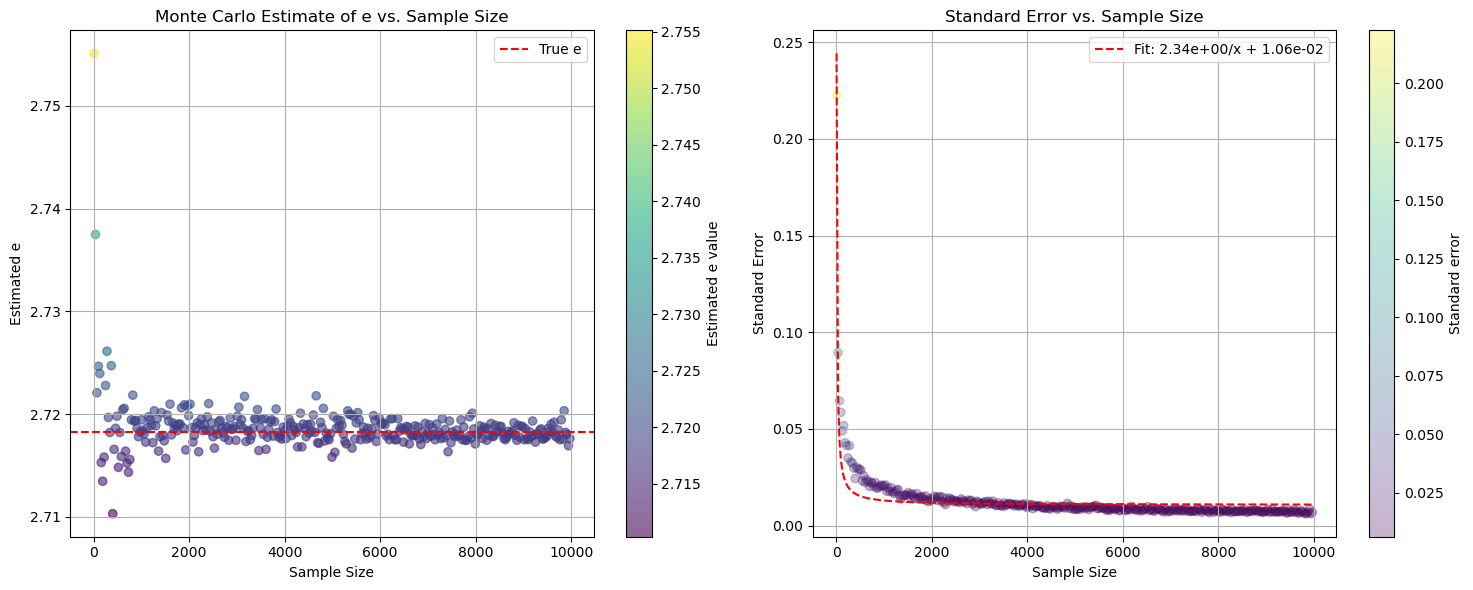

In [33]:
# Generate more points for sample sizes using linear spacing
sample_sizes = np.arange(10, 10000, 30)  # Linearly spaced sample sizes for more data points
results = Parallel(n_jobs=-1)(delayed(compute_estimates)(M) for M in sample_sizes)

# Extract e_estimates and standard_errors from results
e_estimates, standard_errors = zip(*results)

# Create subplots for visualization
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter plot: Monte Carlo estimate of e vs. sample size
sc0 = ax0.scatter(sample_sizes, 
                  e_estimates,
                  c=e_estimates,
                  cmap='viridis',
                  marker="o",
                  alpha=0.6)

ax0.axhline(y=np.exp(1), color="red", linestyle="--", label='True e')
ax0.set_title("Monte Carlo Estimate of e vs. Sample Size", fontsize=12)
ax0.set_xlabel("Sample Size", fontsize=10)
ax0.set_ylabel("Estimated e", fontsize=10)
ax0.grid(True)
ax0.legend()

# Fit a curve of the form a/x + b to the standard errors
def inverse_fit(x, a, b):
    return a / x + b

# Use curve_fit to find the parameters a and b
popt, pcov = curve_fit(inverse_fit, sample_sizes, standard_errors)

# Scatter plot: Standard error vs. sample size
sc1 = ax1.scatter(sample_sizes, 
                  standard_errors,
                  c=standard_errors,
                  cmap='viridis',
                  marker="o",
                  alpha=0.3)

# Plot the fitted 1/x trend line
ax1.plot(sample_sizes, inverse_fit(sample_sizes, *popt), 
         'r--', label=f'Fit: {popt[0]:.2e}/x + {popt[1]:.2e}')

ax1.set_title("Standard Error vs. Sample Size", fontsize=12)
ax1.set_xlabel("Sample Size", fontsize=10)
ax1.set_ylabel("Standard Error", fontsize=10)
ax1.grid(True)
ax1.legend()

plt.colorbar(sc0, ax=ax0, label='Estimated e value')
plt.colorbar(sc1, ax=ax1, label='Standard error')

plt.tight_layout()
plt.show()

# Question 5.

**Show an SDE (and the associated parameters), which simultaneously satisfy the following two conditions:**

## (a.)

**Starting from any finite initial value, the mean of the SDE will eventually converge to zero; and**

## (b.)

**The variance of the SDE will blow up when time t → ∞.**